In [172]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math 

# util functions and imports

def load_df(file_path, sep=',', header=0):
    import pandas as pd
    return pd.read_csv(file_path, sep=sep, header=header)

def scale_and_normalise(df):
    scaler = StandardScaler()
    features = df.drop('spam', axis=1)  # Assuming 'is_spam' is your target
    return scaler.fit_transform(features)

In [173]:
df = load_df('data/spambase.csv')
df.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [174]:
scaled_features = scale_and_normalise(df)
scaled_features

array([[-3.42433707e-01,  3.30884903e-01,  7.12858774e-01, ...,
        -4.52472762e-02,  4.52979198e-02, -8.72413388e-03],
       [ 3.45359395e-01,  5.19091945e-02,  4.35129540e-01, ...,
        -2.44326749e-03,  2.50562832e-01,  1.22832407e+00],
       [-1.45921392e-01, -1.65071912e-01,  8.51723390e-01, ...,
         1.45920848e-01,  2.22110599e+00,  3.25873251e+00],
       ...,
       [ 6.40127868e-01, -1.65071912e-01,  3.83734930e-02, ...,
        -1.19382054e-01, -2.36941335e-01, -2.72627750e-01],
       [ 2.80176333e+00, -1.65071912e-01, -5.56760578e-01, ...,
        -1.27482666e-01, -2.42072958e-01, -3.38603654e-01],
       [-3.42433707e-01, -1.65071912e-01,  7.32696576e-01, ...,
        -1.24236117e-01, -2.42072958e-01, -4.01280763e-01]],
      shape=(4601, 57))

In [175]:
corr_matrix = df.corr()
corr_matrix.sort_values(by='spam', ascending=False, inplace=True)
corr_matrix['spam']

spam                          1.000000
word_freq_your                0.383234
word_freq_000                 0.334787
word_freq_remove              0.332117
char_freq_$                   0.323629
word_freq_you                 0.273651
word_freq_free                0.263215
word_freq_business            0.263204
capital_run_length_total      0.249164
word_freq_our                 0.241920
char_freq_!                   0.241888
word_freq_receive             0.234529
word_freq_over                0.232604
word_freq_order               0.231551
word_freq_money               0.216111
capital_run_length_longest    0.216097
word_freq_internet            0.206808
word_freq_email               0.204208
word_freq_all                 0.196988
word_freq_addresses           0.195902
word_freq_credit              0.189761
word_freq_mail                0.138962
word_freq_people              0.132927
word_freq_make                0.126208
capital_run_length_average    0.109999
word_freq_font           

Text(0, 0.5, 'word_freq_your')

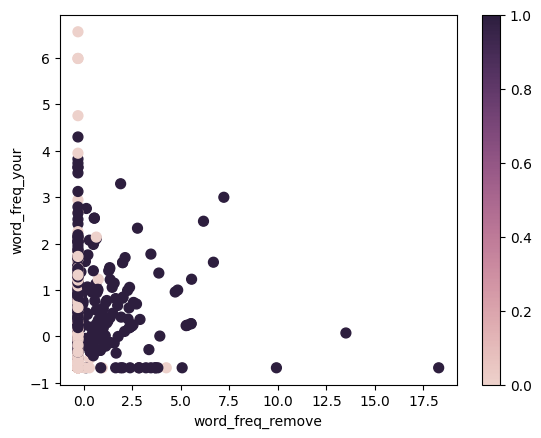

In [176]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['spam'], test_size=0.2, random_state=42)

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()

# find what column index word_freq_your and word_freq_000 are
word_freq_your_idx = df.columns.get_loc('word_freq_your')
word_freq_remove_idx = df.columns.get_loc('word_freq_remove')

# Convert to np array
if not isinstance(X_test, np.ndarray):
    X_test = X_test.to_numpy()

points = ax.scatter(
    X_test[:, word_freq_remove_idx], X_test[:, word_freq_your_idx], c=y_test, s=50, cmap=cmap
)

f.colorbar(points)
plt.xlabel('word_freq_remove')
plt.ylabel('word_freq_your')

RMSE: 0.5682021866453039
accuracy: 0.90


Text(0, 0.5, 'word_freq_your')

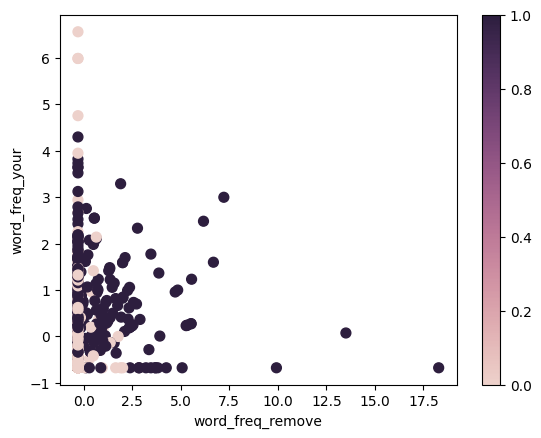

In [177]:
knn_model = KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['spam'], test_size=0.2, random_state=42)

knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

rmse = math.sqrt(root_mean_squared_error(y_test, y_pred))
accuracy_score = accuracy_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'accuracy: {accuracy_score:.2f}')

cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()

# find what column index word_freq_your and word_freq_000 are
word_freq_your_idx = df.columns.get_loc('word_freq_your')
word_freq_remove_idx = df.columns.get_loc('word_freq_remove')

# Convert to np array
if not isinstance(X_test, np.ndarray):
    X_test = X_test.to_numpy()

points = ax.scatter(
    X_test[:, word_freq_remove_idx], X_test[:, word_freq_your_idx], c=y_pred, s=50, cmap=cmap
)

f.colorbar(points)
plt.xlabel('word_freq_remove')
plt.ylabel('word_freq_your')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)